##  Stock Price Predictor using LSTM

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project we have use a [Long Short Term Memory networks – usually just called “LSTMs”] to predict the closing price of the [S&P 500] using a dataset of past prices


## Get the Data

In the following cells we download and save the [S&P 500 dataset](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

   **Step 1 :** Define a function to get historical data from yahoo finance

In [106]:
import yfinance as yf
import pandas as pd
import datetime


In [107]:
def get_historical_data(symbol,start_date,end_date):
    ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
    symbol = symbol.upper()
    start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
    end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))
    url_string = "http://www.google.com/finance/historical?q={0}".format(symbol)
    url_string += "&startdate={0}&enddate={1}&num={0}&ei=KKltWZHCBNWPuQS9147YBw&output=csv".format(start.strftime('%b%d,%Y'), end.strftime('%b%d,%Y'),4000)
    
    col_names = ['Date','Open','High','Low','Close','Volume']
    stocks = pd.read_csv(url_string, header=0, names=col_names) 
    df = pd.DataFrame(stocks)
    return df

def get_yfinance_data(ticker:str, period:str):
    stock = yf.Ticker(ticker)
    df = stock.history(period)
    df.drop(["Dividends", "Stock Splits"], inplace=True, axis=1)
    df.reset_index(inplace=True)
    df.describe()
    return df

 **Step 2:** get the data of desired firm from [Google Finance](http://www.google.com/finance).

In [108]:
#data = get_historical_data('GOOGL','2005-01-01','2017-06-30') # from January 1, 2005 to June 30, 2017
#data

**Step 3:** Write the data to a csv file.

In [109]:
data = pd.read_csv('google.csv')
data

,Date,Open,High,Low,Close,Volume
0,30-Jun-17,943.99,945.00,929.61,929.68,2287662
1,29-Jun-17,951.35,951.66,929.60,937.82,3206674
2,28-Jun-17,950.66,963.24,936.16,961.01,2745568
3,27-Jun-17,961.60,967.22,947.09,948.09,2443602
4,26-Jun-17,990.00,993.99,970.33,972.09,1517912
...,...,...,...,...,...,...
3140,7-Jan-05,95.42,97.22,94.48,97.02,9666175
3141,6-Jan-05,97.72,98.05,93.95,94.37,10389803
3142,5-Jan-05,96.82,98.55,96.21,96.85,8239545
3143,4-Jan-05,100.77,101.57,96.84,97.35,13762396


In [110]:
data_us = get_yfinance_data("RELIANCE.NS","15y")
data_us

,Date,Open,High,Low,Close,Volume
0,2007-02-01,302.128144,305.661800,301.255759,304.248322,3713182
1,2007-02-02,305.595494,307.804039,302.139130,303.685120,6589426
2,2007-02-05,304.778330,307.207727,303.011516,306.401611,3887939
3,2007-02-06,293.735647,310.962248,293.735647,306.810181,7092660
4,2007-02-07,308.753654,309.151187,305.054340,308.069000,6166087
...,...,...,...,...,...,...
3694,2022-01-25,2349.550049,2388.649902,2305.000000,2373.250000,11311456
3695,2022-01-27,2336.000000,2356.100098,2311.050049,2338.100098,9239426
3696,2022-01-28,2365.000000,2375.899902,2328.399902,2335.850098,6769154
3697,2022-01-31,2360.199951,2406.399902,2356.199951,2386.600098,5604308


# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [111]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


        Date    Open    High     Low   Close   Volume
0  30-Jun-17  943.99  945.00  929.61  929.68  2287662
1  29-Jun-17  951.35  951.66  929.60  937.82  3206674
2  28-Jun-17  950.66  963.24  936.16  961.01  2745568
3  27-Jun-17  961.60  967.22  947.09  948.09  2443602
4  26-Jun-17  990.00  993.99  970.33  972.09  1517912


Open   --- mean : 382.51416852146383   	 Std:  213.48651683323408   	 Max:  1005.49   	 Min:  87.74
High   --- mean : 385.87209856915837   	 Std:  214.60229511464593   	 Max:  1008.61   	 Min:  89.29
Low    --- mean : 378.7371255961842   	 Std:  212.08010983015183   	 Max:  996.62   	 Min:  86.37
Close  --- mean : 382.3502480127191   	 Std:  213.43595872312488   	 Max:  1004.28   	 Min:  87.58
Volume --- mean : 4205707.889666136   	 Std:  3877483.007730211   	 Max:  41182889   	 Min:  521141


In [112]:
data_us
print(data_us.head())

print("\n")
print("Open   --- mean :", np.mean(data_us['Open']),  "  \t Std: ", np.std(data_us['Open']),  "  \t Max: ", np.max(data_us['Open']),  "  \t Min: ", np.min(data_us['Open']))
print("High   --- mean :", np.mean(data_us['High']),  "  \t Std: ", np.std(data_us['High']),  "  \t Max: ", np.max(data_us['High']),  "  \t Min: ", np.min(data_us['High']))
print("Low    --- mean :", np.mean(data_us['Low']),   "  \t Std: ", np.std(data_us['Low']),   "  \t Max: ", np.max(data_us['Low']),   "  \t Min: ", np.min(data_us['Low']))
print("Close  --- mean :", np.mean(data_us['Close']), "  \t Std: ", np.std(data_us['Close']), "  \t Max: ", np.max(data_us['Close']), "  \t Min: ", np.min(data_us['Close']))
print("Volume --- mean :", np.mean(data_us['Volume']),"  \t\t Std: ", np.std(data_us['Volume']),"  \t Max: ", np.max(data_us['Volume']),"  \t Min: ", np.min(data_us['Volume']))


        Date        Open        High         Low       Close   Volume
0 2007-02-01  302.128144  305.661800  301.255759  304.248322  3713182
1 2007-02-02  305.595494  307.804039  302.139130  303.685120  6589426
2 2007-02-05  304.778330  307.207727  303.011516  306.401611  3887939
3 2007-02-06  293.735647  310.962248  293.735647  306.810181  7092660
4 2007-02-07  308.753654  309.151187  305.054340  308.069000  6166087


Open   --- mean : 765.6756261606465   	 Std:  577.5134878713019   	 Max:  2742.75   	 Min:  229.8633739717012
High   --- mean : 775.0004524316969   	 Std:  583.5474807545422   	 Max:  2751.35009765625   	 Min:  242.51852179092026
Low    --- mean : 755.3657696780433   	 Std:  570.4411546542243   	 Max:  2708.0   	 Min:  208.12242102058988
Close  --- mean : 764.7467901348971   	 Std:  576.5517436676695   	 Max:  2731.85009765625   	 Min:  228.1513671875
Volume --- mean : 10114272.023249527   		 Std:  7058545.824378554   	 Max:  87061779   	 Min:  0


**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [113]:
import preprocess_data as ppd
stocks = ppd.remove_data(data_us)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item         Open        Close    Volume
0     0  2408.000000  2378.699951   6088821
1     1  2360.199951  2386.600098   5604308
2     2  2365.000000  2335.850098   6769154
3     3  2336.000000  2338.100098   9239426
4     4  2349.550049  2373.250000  11311456
---
      Item        Open       Close   Volume
3694  3694  308.753654  308.069000  6166087
3695  3695  293.735647  306.810181  7092660
3696  3696  304.778330  306.401611  3887939
3697  3697  305.595494  303.685120  6589426
3698  3698  302.128144  304.248322  3713182


**Step 2:** Visualise raw data.

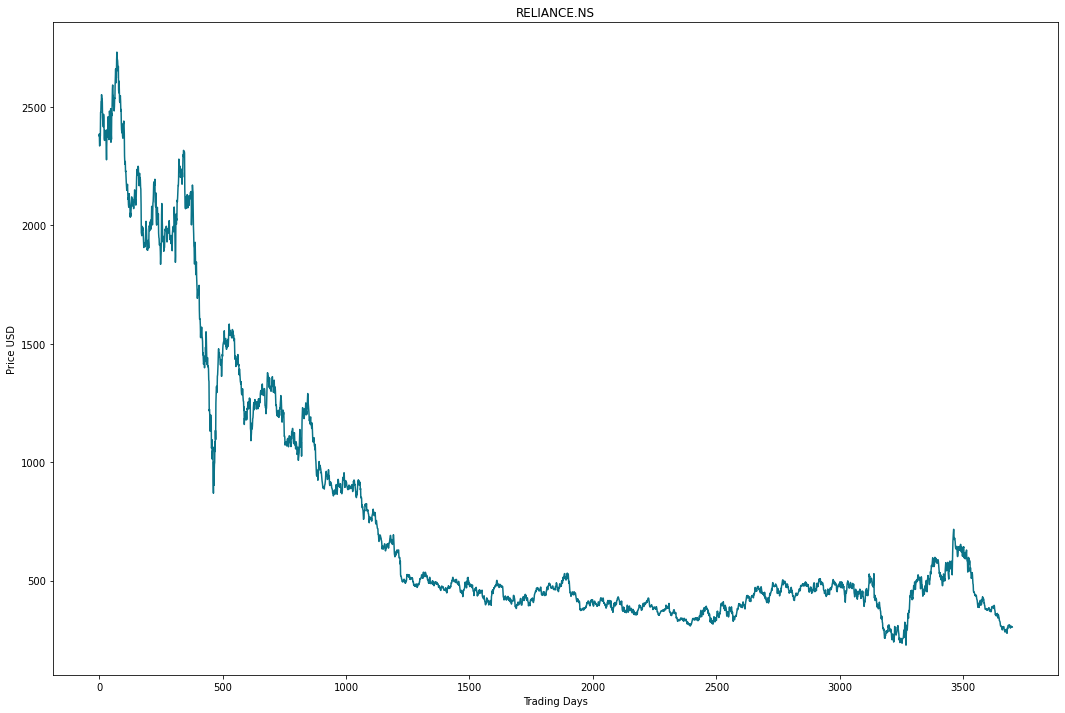

In [114]:
import visualize

visualize.plot_basic(stocks,title="RELIANCE.NS")

**Step 3 :** Normalise the data using minmaxscaler function

In [115]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.866787  0.858949  0.069937
1     1  0.847765  0.862104  0.064372
2     2  0.849675  0.841834  0.077751
3     3  0.838134  0.842733  0.106125
4     4  0.843527  0.856772  0.129924


Open   --- mean : 0.2132257964362736   	 Std:  0.2298207495274392   	 Max:  0.9999999999999999   	 Min:  0.0
Close  --- mean : 0.2143210828113232   	 Std:  0.23028000000612134   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.11617350506069417   	 Std:  0.08107513888934606   	 Max:  1.0   	 Min:  0.0


**Step 4 :** Visualize the data again

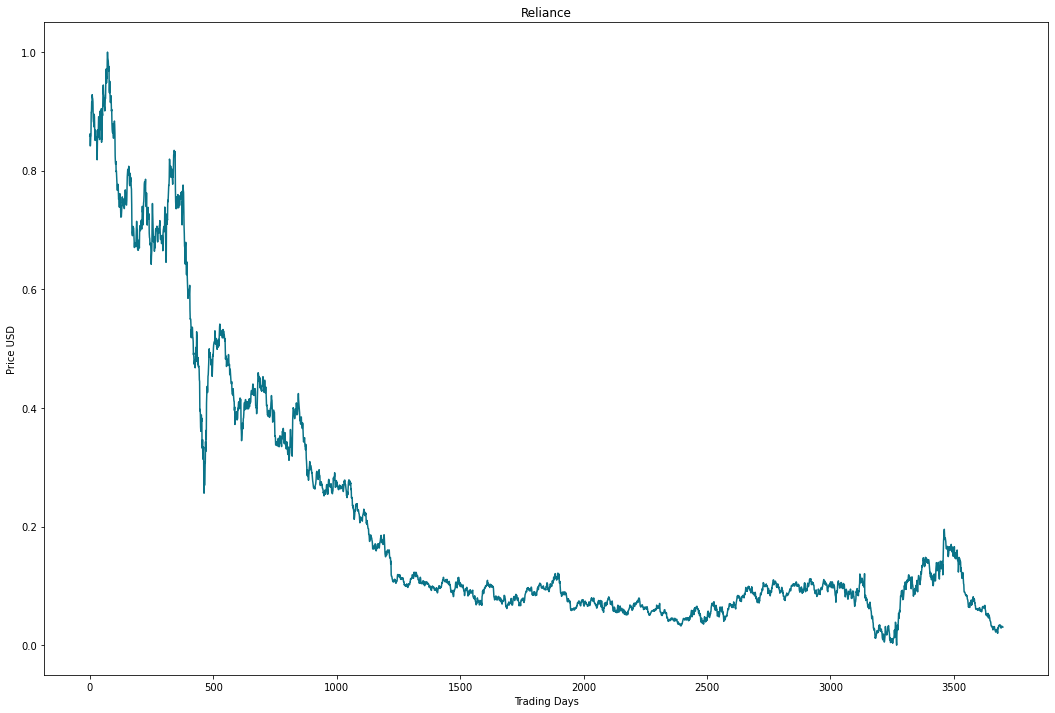

In [116]:
visualize.plot_basic(stocks, title="Reliance")

**Step 5:** Log the normalised data for future resuablilty

In [117]:
stocks.to_csv('reliance_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [118]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('reliance_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.866787,0.858949,0.069937
1,1,0.847765,0.862104,0.064372
2,2,0.849675,0.841834,0.077751
3,3,0.838134,0.842733,0.106125
4,4,0.843527,0.856772,0.129924


**Step 2:** Split data into train and test pair

In [119]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2960, 1)
y_train (2960, 1)
x_test (739, 1)
y_test (739, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [120]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [121]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

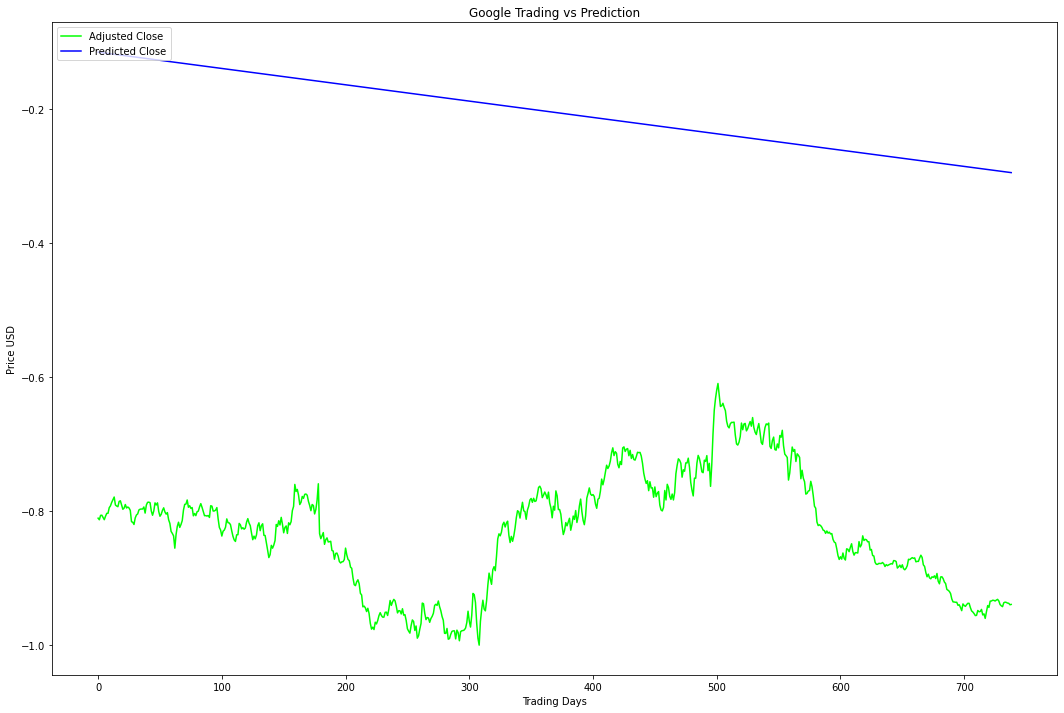

In [122]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [123]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.9355 MSE (0.9672 RMSE)
Test Score: 0.40024871 MSE (0.63265212 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [124]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
import tensorflow as tf

from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume
0,0.012051,0.015141,0.377248
1,0.014198,0.010658,0.325644
2,0.009894,0.010112,0.189820
3,0.010874,0.007407,0.242701
4,0.008368,0.010298,0.224905


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [125]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2589, 50, 3)
y_train (2589,)
x_test (446, 50, 3)
y_test (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [126]:
def build_basic_model(input_dim, output_dim, return_sequences):
    """
    Builds a basic lstm model 
    :param input_dim: input dimension of the model
    :param output_dim: output dimension of the model
    :param return_sequences: return sequence of the model
    :return: a basic lstm model with 3 layers.
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        100,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model
build_basic_model(4,3,10)

In [127]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0028476715087890625


**Step 4:** Train the model

In [128]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

77/77 [==============================] - 5s 40ms/step - loss: 0.0026 - val_loss: 4.1710e-04


**Step 5:** make prediction using test data

In [129]:
predictions = model.predict(X_test)

**Step 6:** Plot the results

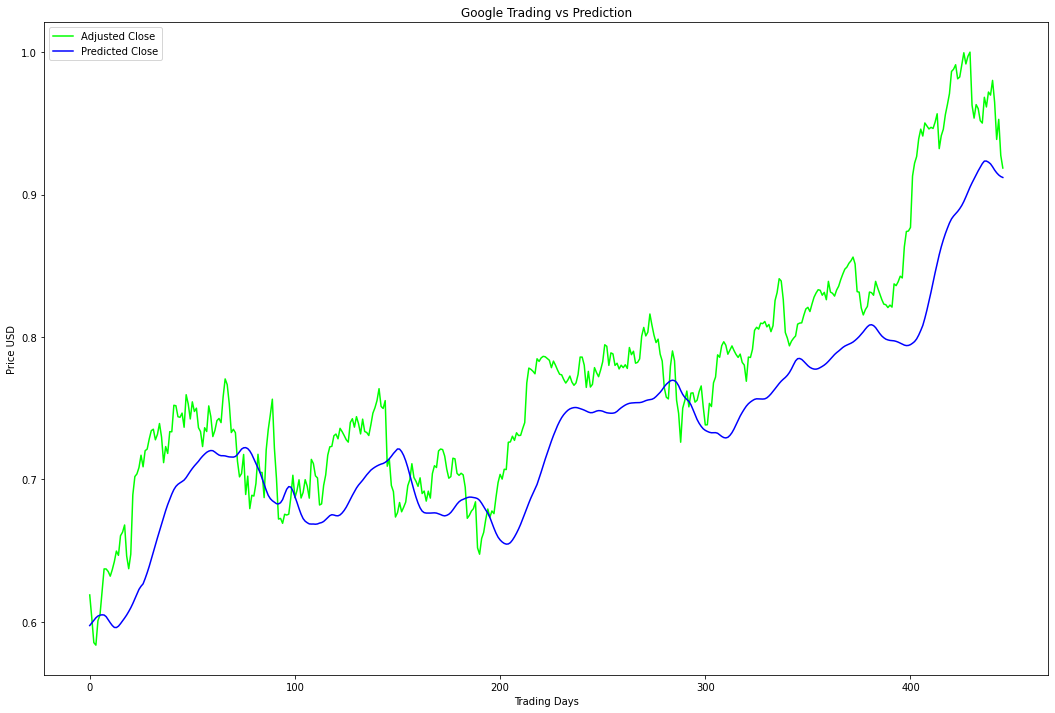

In [130]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [131]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00039286 MSE (0.01982062 RMSE)
Test Score: 0.00243718 MSE (0.04936784 RMSE)


### Improved LSTM Model

**Step 1:** Build an improved LSTM model

In [132]:

def build_improved_model(input_dim, output_dim, return_sequences):
    """
    Builds an improved Long Short term memory model using keras.layers.recurrent.lstm
    :param input_dim: input dimension of model
    :param output_dim: ouput dimension of model
    :param return_sequences: return sequence for the model
    :return: a 3 layered LSTM model
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dropout(0.2))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model

In [133]:
# Set up hyperparameters
batch_size = 100
epochs = 12

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0029358863830566406


**Step 2:** Train improved LSTM model

In [134]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.1
         )

Epoch 1/12
24/24 - 5s - loss: 0.0093 - val_loss: 7.9162e-04 - 5s/epoch - 190ms/step
Epoch 2/12
24/24 - 2s - loss: 8.5919e-04 - val_loss: 0.0012 - 2s/epoch - 70ms/step
Epoch 3/12
24/24 - 2s - loss: 7.1434e-04 - val_loss: 3.8164e-04 - 2s/epoch - 70ms/step
Epoch 4/12
24/24 - 2s - loss: 6.5119e-04 - val_loss: 3.9265e-04 - 2s/epoch - 95ms/step
Epoch 5/12
24/24 - 3s - loss: 6.1492e-04 - val_loss: 3.8141e-04 - 3s/epoch - 105ms/step
Epoch 6/12
24/24 - 3s - loss: 6.6013e-04 - val_loss: 5.0564e-04 - 3s/epoch - 111ms/step
Epoch 7/12
24/24 - 3s - loss: 6.0467e-04 - val_loss: 3.6570e-04 - 3s/epoch - 128ms/step
Epoch 8/12
24/24 - 3s - loss: 5.6837e-04 - val_loss: 3.6638e-04 - 3s/epoch - 110ms/step
Epoch 9/12
24/24 - 3s - loss: 5.6684e-04 - val_loss: 4.2096e-04 - 3s/epoch - 112ms/step
Epoch 10/12
24/24 - 3s - loss: 5.4137e-04 - val_loss: 4.1918e-04 - 3s/epoch - 109ms/step
Epoch 11/12
24/24 - 2s - loss: 5.4710e-04 - val_loss: 3.7809e-04 - 2s/epoch - 100ms/step
Epoch 12/12
24/24 - 3s - loss: 5.1406e-04

**Step 3:** Make prediction on improved LSTM model

In [135]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

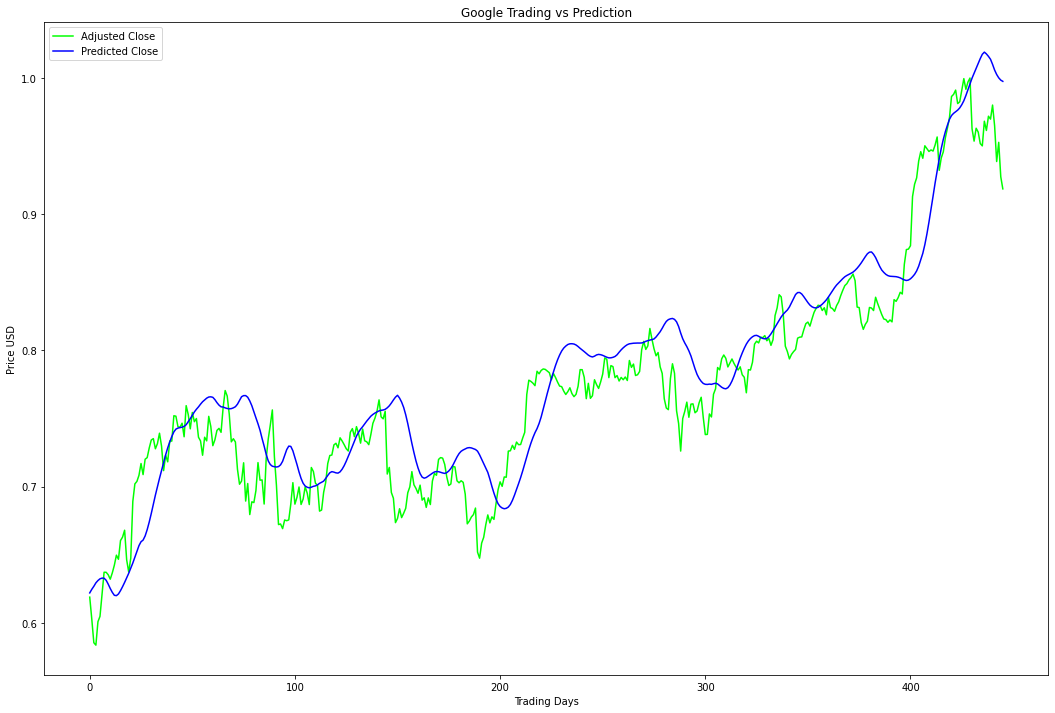

In [136]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [137]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00032964 MSE (0.01815596 RMSE)
Test Score: 0.00107752 MSE (0.03282561 RMSE)


In [138]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.001078 - RMSE * Adjusted Close Range


# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [139]:
# import preprocess_data as ppd

# data = pd.read_csv('googl.csv')

# stocks = ppd.remove_data(data)

# stocks = ppd.get_normalised_data(stocks)

# stocks = stocks.drop(['Item'], axis = 1)
# #Print the dataframe head and tail
# print(stocks.head())

# X = stocks[:].as_matrix()
# Y = stocks[:]['Close'].as_matrix()

# X = sd.unroll(X,1)
# Y = Y[-X.shape[0]:]

# print(X.shape)
# print(Y.shape)

# # Generate predictions 
# predictions = model.predict(X)

# #get the test score
# testScore = model.evaluate(X, Y, verbose=0)
# print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))